In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string
string.punctuation
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
data = pd.read_json('/content/fox-news-comments.json', lines=True)
data.head()

,title,text,label,succ,meta,user,mentions,prev
0,German lawmakers approve 'no means no' rape la...,Merkel would never say NO,1,,German lawmakers passed a bill Thursday that w...,barryswallows,,
1,German lawmakers approve 'no means no' rape la...,"Expect more and more women to be asking .. ""wh...",1,,German lawmakers passed a bill Thursday that w...,PostApocalypticHero,,
2,German lawmakers approve 'no means no' rape la...,Groping people in public wasn't already illega...,0,,German lawmakers passed a bill Thursday that w...,californiamojo,,
3,German lawmakers approve 'no means no' rape la...,"Merkel, possible the only person in charge who...",1,,German lawmakers passed a bill Thursday that w...,MikeSte,,
4,German lawmakers approve 'no means no' rape la...,"They know very well, no means NO! They need to...",1,,German lawmakers passed a bill Thursday that w...,scientist,,


In [10]:
data.describe()

,label
count,1528.000000
mean,0.284686
std,0.451412
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [11]:
# percentile list
perc =[.20, .40, .60, .80]
data.dropna(inplace = True) 
  
# list of dtypes to include
include =['object', 'float', 'int']
data.describe(percentiles = perc, include = include)

,title,text,label,succ,meta,user,mentions,prev
count,1528,1528,1528.000000,1528,1528,1528,1528,1528
unique,10,1520,NaN,644,10,678,468,314
top,"Texas, 12 states to ask judge to stall Obama t...",So you think it's moral to discriminate agains...,NaN,,Texas and 12 other states are asking a federal...,wayne230,,
freq,246,2,NaN,682,246,56,700,715
mean,NaN,NaN,0.284686,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.451412,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
20%,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
40%,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


In [12]:
data["label"].describe()

count    1528.000000
mean        0.284686
std         0.451412
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: label, dtype: float64

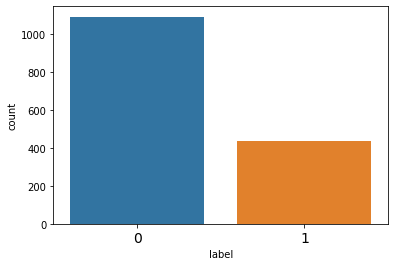

In [13]:
#plot the class distribution
small_size = 14
plt.rc('xtick', labelsize=small_size)  
sns.countplot(x='label',data=data)

In [15]:
print("This is hate speech")
hs = data[data['label']==1]
hs.head()

This is hate speech


,title,text,label,succ,meta,user,mentions,prev
0,German lawmakers approve 'no means no' rape la...,Merkel would never say NO,1,,German lawmakers passed a bill Thursday that w...,barryswallows,,
1,German lawmakers approve 'no means no' rape la...,"Expect more and more women to be asking .. ""wh...",1,,German lawmakers passed a bill Thursday that w...,PostApocalypticHero,,
3,German lawmakers approve 'no means no' rape la...,"Merkel, possible the only person in charge who...",1,,German lawmakers passed a bill Thursday that w...,MikeSte,,
4,German lawmakers approve 'no means no' rape la...,"They know very well, no means NO! They need to...",1,,German lawmakers passed a bill Thursday that w...,scientist,,
5,German lawmakers approve 'no means no' rape la...,look like merkel just want to get laid,1,,German lawmakers passed a bill Thursday that w...,AllaGranovskaya,,


In [16]:
print("This is normal language")
normal = data[data['label']==0]
normal.head()

This is normal language


,title,text,label,succ,meta,user,mentions,prev
2,German lawmakers approve 'no means no' rape la...,Groping people in public wasn't already illega...,0,,German lawmakers passed a bill Thursday that w...,californiamojo,,
7,German lawmakers approve 'no means no' rape la...,"She said ""GO"", not ""NO"" ~ ~ Slime ball Lawyers...",0,,German lawmakers passed a bill Thursday that w...,JoeSnow,,
14,German lawmakers approve 'no means no' rape la...,A one-year suspended sentence? Wow. That's rea...,0,,German lawmakers passed a bill Thursday that w...,EdLowery,,
15,German lawmakers approve 'no means no' rape la...,Even though the woman was lying about the whol...,0,You mean all 50?,German lawmakers passed a bill Thursday that w...,DAB123,,
16,German lawmakers approve 'no means no' rape la...,You mean all 50?,0,,German lawmakers passed a bill Thursday that w...,Danica70,@DAB123,Even though the woman was lying about the whol...


435
Hate speech keywords:



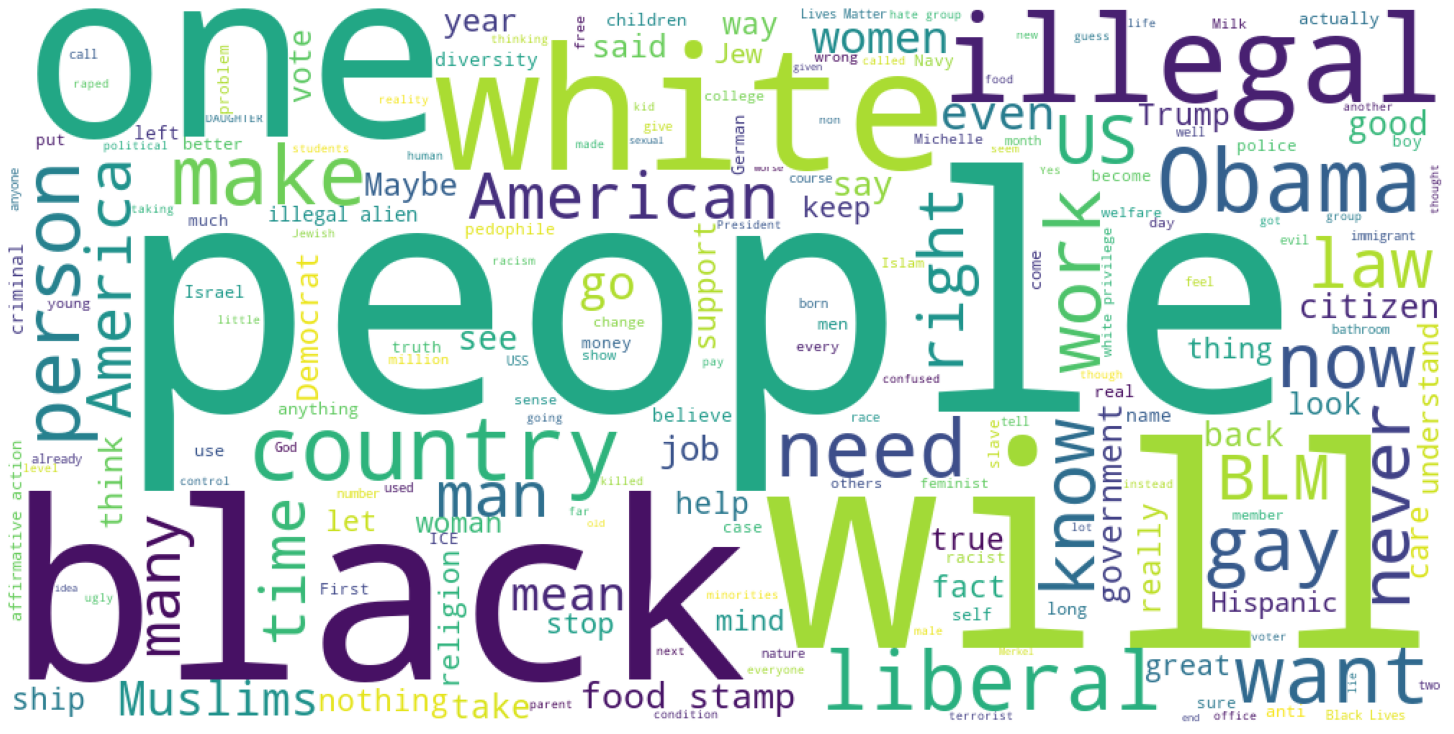

In [17]:
sentences = hs['text'].tolist()
print(len(sentences))

sentences_as_one_string = " ".join(sentences)
print("Hate speech keywords:")
print("")
plt.figure(figsize=(20,20))
plt.imshow(WordCloud(width = 1000, height = 500,background_color="white").generate(sentences_as_one_string))
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Neutral keywords:



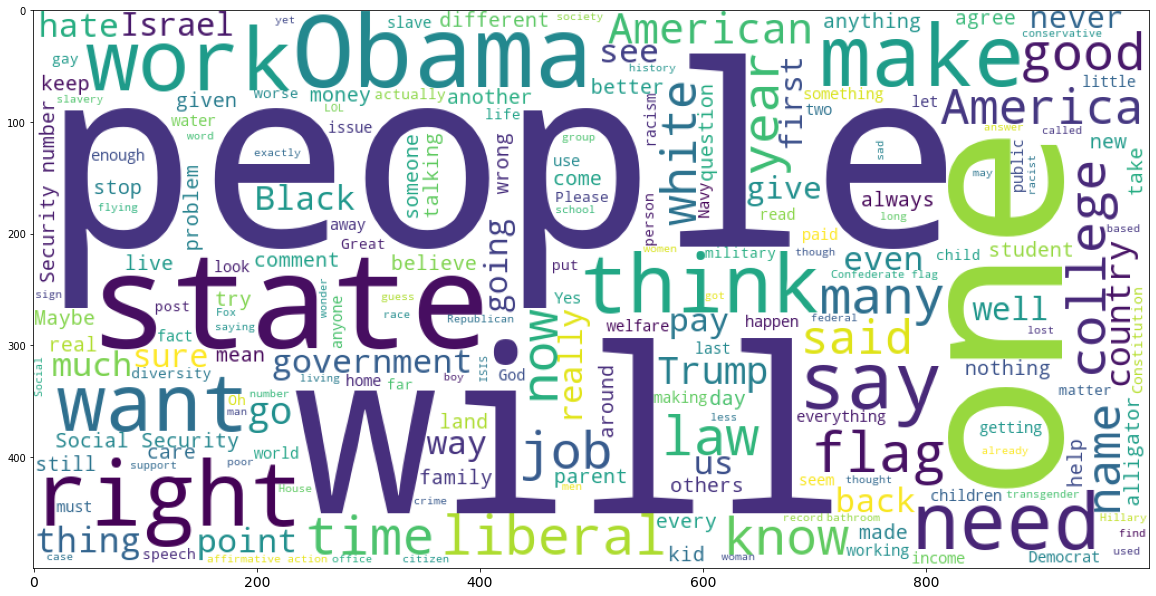

In [18]:
sentences = normal['text'].tolist()
len(sentences)
print("Neutral keywords:")
print("")
sentences_as_one_string = " ".join(sentences)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud(width = 1000, height = 500,background_color="white").generate(sentences_as_one_string))


In [19]:
# define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    Test_punc_removed_join_clean_join = ' '.join(Test_punc_removed_join_clean)
    return Test_punc_removed_join_clean_join


In [21]:
# Create a new Dataframe for cleaned text
data_clean = pd.DataFrame(columns=['label', 'text'])
data_clean['text'] = data['text'].apply(message_cleaning)
data_clean['label'] = data['label']
data_clean.head()

,label,text
0,1,Merkel would never say
1,1,Expect women asking men longer interested goin...
2,0,Groping people public wasnt already illegal Wh...
3,1,Merkel possible person charge worse Obama tryi...
4,1,know well means need pass law making legal cas...


In [22]:
print("Original version:")
print(data['text'][5]) 
print("Cleaned:")
print(data_clean['text'][5]) 

Original version:
look like merkel just want to get laid
Cleaned:
look like merkel want get laid


435
Hate speech keywords:



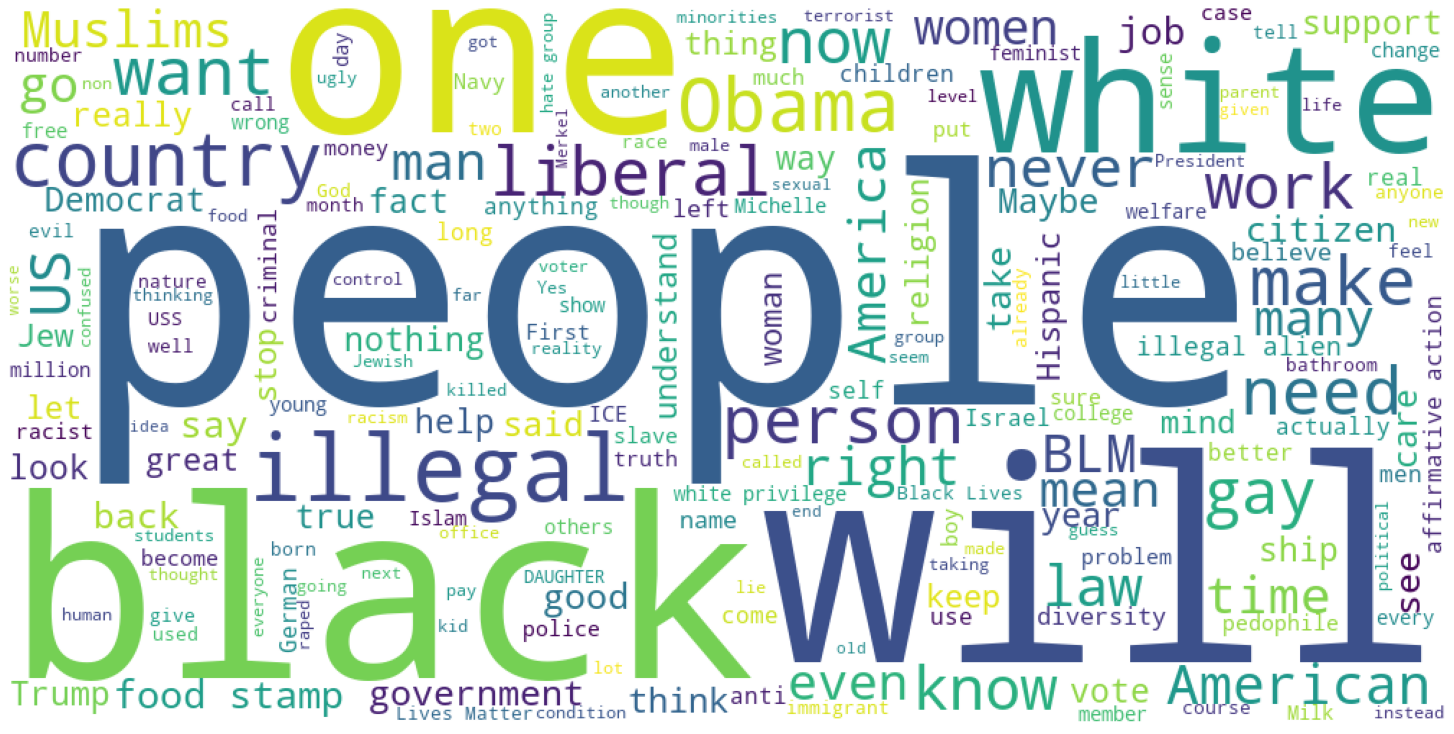

In [23]:
sentences = hs['text'].tolist()
print(len(sentences))

sentences_as_one_string = " ".join(sentences)
print("Hate speech keywords:")
print("")
plt.figure(figsize=(20,20))
plt.imshow(WordCloud(width = 1000, height = 500,background_color="white").generate(sentences_as_one_string))
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Normal keywords:



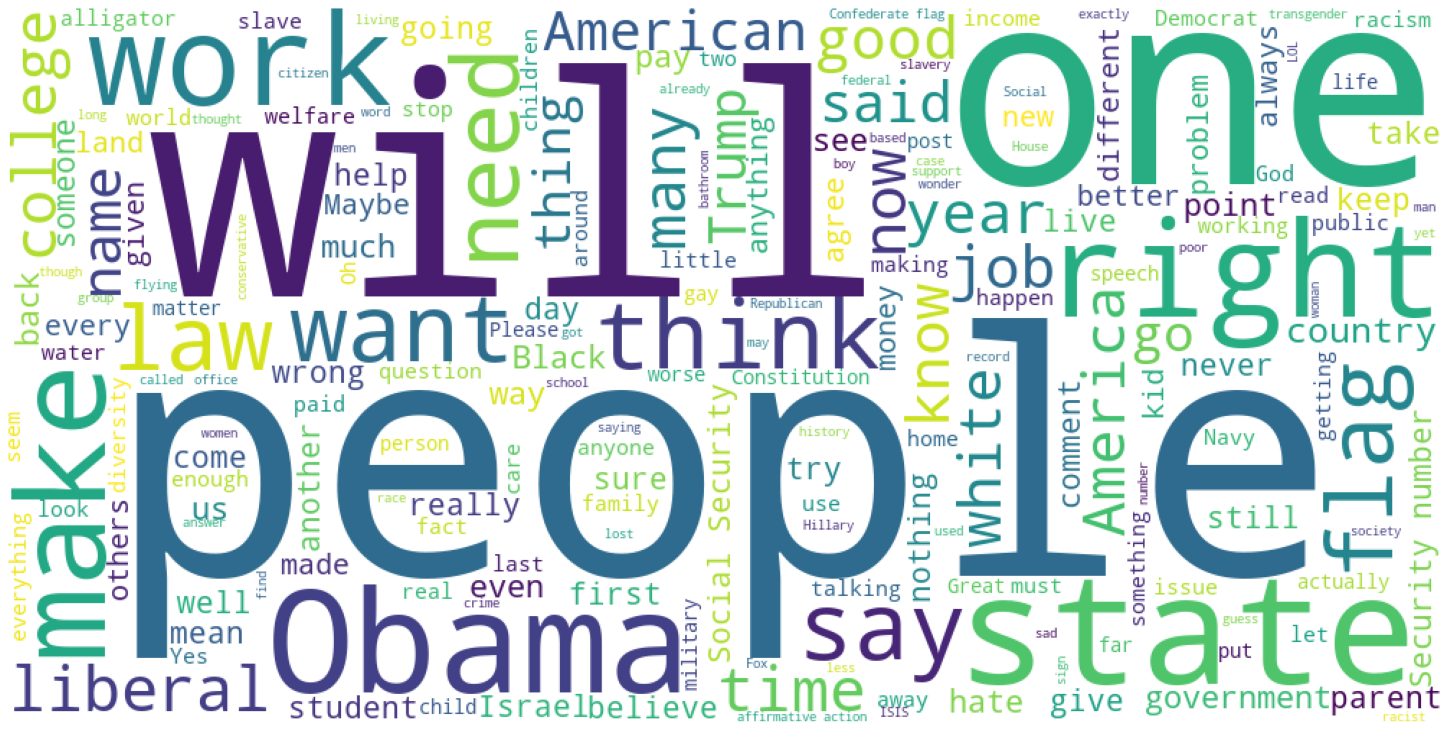

In [24]:
sentences = normal['text'].tolist()
len(sentences)
print("Normal keywords:")
print("")
sentences_as_one_string = " ".join(sentences)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud(width = 1000, height = 500,background_color="white").generate(sentences_as_one_string))
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()